In [170]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from scipy.special import comb
import seaborn
import math
import scipy.stats
from pyearth import Earth
from sklearn.linear_model import LinearRegression

# 1. Simulate Data

In [303]:
class Data_Stuff():
        
    def __init__(self, mean, std, n):
        self.n = n
        self.data = np.absolute(np.random.normal(mean/4, std, size = 50))
        self.data = np.absolute(np.append(self.data, np.random.normal(mean, std, size = 100)))
        self.data = np.absolute(np.append(self.data, np.random.normal(mean*3, std, size = 50)))
        self.data = np.absolute(np.append(self.data, np.random.normal(mean*2, std, size = 50)))
        self.data = np.absolute(np.append(self.data, np.random.normal(mean*3, std, size = 50)))
        
    def plot_series(self):
        plt.plot(range(len(self.data)), self.data)
        plt.show()
        plt.close()
        return

    def get_pdf(self):
        hist = np.histogram(self.data, bins=100)
        hist_dist = scipy.stats.rv_histogram(hist)
        return hist_dist

    def plot_pdf(self):
        plt.hist(self.data, bins = 100)
        plt.show()
        plt.close()
        return 

    def plot_cdf_pdf(self):
        X = np.linspace(-5.0, 5.0, 100)
        plt.title("PDF and CDF")
        plt.hist(self.data, density=True, bins=100)
        hist = np.histogram(self.data, bins=100)
        hist_dist = scipy.stats.rv_histogram(hist)
#         plt.plot(X, hist_dist.pdf(X), label='PDF')
#         plt.plot(X, hist_dist.cdf(X), label='CDF')
#         plt.show()
        return
    
    def plot_cdf(self):
        cdf_data = [sum(self.data[:i]) for i in range(len(self.data))]
#         plt.plot(range(len(cdf_data)), cdf_data)
#         plt.show()
#         plt.close()
        return np.array(cdf_data)

# 2. Spline Regression

Forward Pass
-----------------------------------------------------------------------------------
iter  parent  var  knot  mse                 terms  gcv              rsq    grsq   
-----------------------------------------------------------------------------------
0     -       -    -     54494160596.362457  1      55043216682.773  0.000  0.000  
1     0       0    189   12863825.301680     3      13671830.483     1.000  1.000  
-----------------------------------------------------------------------------------
Stopping Condition 1: Achieved RSQ value within threshold of 1

Pruning Pass
----------------------------------------------------------------
iter  bf  terms  mse             gcv              rsq    grsq   
----------------------------------------------------------------
0     -   3      12863825.30     13671830.483     1.000  1.000  
1     1   2      72774812.36     75390387.624     0.999  0.999  
2     2   1      54494160596.36  55043216682.773  0.000  0.000  
----------------

/Users/michellezhao/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/michellezhao/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


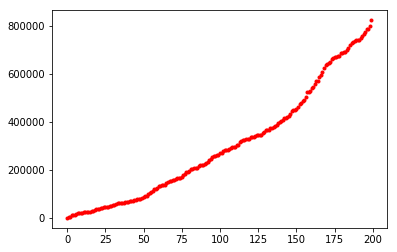

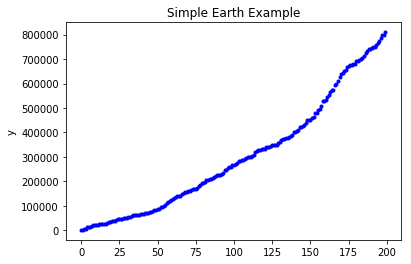

In [266]:
data = cdf_data
m = len(data)
n = 5 #look back
X = np.zeros((m, n))
for i in range(len(data)):
    add = np.zeros(5)
    for j in range(5):
        if i-1-j < 0:
            add[j] = 0
        else:
            add[j] = data[i-1-j]
    X[i] = add
model = Earth()
model.fit(X,data)

#Print the model
print(model.trace())
print(model.summary())

#Plot the model
y_hat = model.predict(X)
plt.figure()
#plt.plot(X[:,6],y,'r.')
plt.plot(range(len(data)),data,'r.')
plt.show()
plt.plot(range(len(y_hat)),y_hat,'b.')
#plt.xlabel('x_6')
plt.ylabel('y')
plt.title('Simple Earth Example')
plt.show()

model.basis_

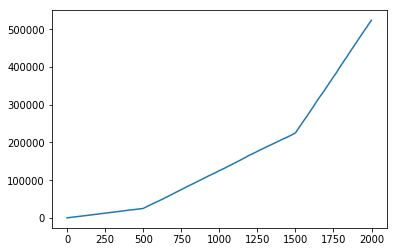

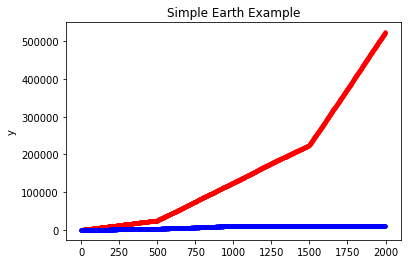

In [148]:
data2 = Data_Stuff(1000, 200, 100)
cdf2 = data2.plot_cdf()
m = len(cdf2)
n = 5 #look back
start_X = cdf2[1:6]

y_hat = []
for i in range(len(cdf2)-1):
    inputs = np.array(start_X[-5:]).reshape(1,5)
#     print("inputs", inputs)
    pred_y = model.predict(inputs)
    y_hat.append(pred_y)
#     print("pred y", pred_y)
    start_X.append(pred_y)
    
plt.figure()
#plt.plot(X[:,6],y,'r.')
plt.plot(range(len(cdf2)),cdf2,'r.')
plt.plot(range(len(y_hat)),y_hat,'b.')
#plt.xlabel('x_6')
plt.ylabel('y')
plt.title('Simple Earth Example')
plt.show()


In [235]:
def bin_time_by_volume(time_traded, quantities, nbins=100):
    total_vol = sum(quantities)
    bin_size = total_vol/nbins
    intervals = []
    start_time = min(time_traded)
    end_time = max(time_traded)
    count = 0
    bins = []
    bin_times = []
    split_quantities = []
    q = []
    for i in range(len(time_traded)):
        q.append(quantities[i])
        count += quantities[i]
        if i == len(time_traded)-1:
            split_quantities.append(q)
            bins.append(count)
            bin_times.append((start_time, time_traded[i]))
            break
        if count >= bin_size:
            split_quantities.append(q)
            q = []
            bins.append(count)
            count = 0
            bin_times.append((start_time, time_traded[i]))
            start_time = time_traded[i]
    return bins, bin_times, split_quantities
        

In [296]:
def get_past_days_data(ndays = 5, is_cdf = False):
    days = []
    for d in range(ndays):
        D = Data_Stuff(int(np.random.normal(100,10,1)), int(np.random.normal(50,10,1)), 100)
        if is_cdf == True:
            cdf = D.plot_cdf()
            days.append(cdf)
        else:
            days.append(D.data)
    return days

In [297]:
def get_features_from_past_days(days):
    X = []
    n = len(days[0])
    for i in range(n):
        past = [days[d].data[i] for d in range(len(days))]
        X.append(past)
#     print(X)
    return np.array(X)

In [325]:
def manual_spline_regression(X, data, nbins = 100):
    print("X shape", X.shape)
    bins, bin_times, split_quantities = bin_time_by_volume(range(len(data)), data, nbins)
    print(bin_times)
    pred = []
    actual = []
    for b in range(nbins):
        start = bin_times[b][0]
        end = bin_times[b][1]
        print("state")
        trainX = X[start:end]
        trainY = data[start:end]
        actual.append(trainY)
        print('y shape', trainY.shape)
        reg = LinearRegression().fit(trainX, trainY)
        print(reg.coef_)
        pred_y = reg.predict(trainX)
        print('predicted y shape', pred_y.shape)
        pred.append(pred_y)
    return pred, actual

In [329]:
def test_manual_spline(data, is_cdf = False):
    days = get_past_days_data(5, is_cdf)
    X = get_features_from_past_days(days)
    pred, actual = manual_spline_regression(X, data, 5)
    plot_pred = np.concatenate(pred)
    plt.plot(range(len(data)), data, color = 'r')
    plt.plot(range(len(plot_pred)), plot_pred, color = 'b')
    plt.show()
    return pred, actual

# Error Metric Evaluation

In [340]:
def three_errors(actual_dist, pred_dist):
    nbins = len(actual_dist)
    pred_dist /= sum(pred_dist)
    actual_dist /= sum(actual_dist)
    rmse = math.sqrt(sum((pred_dist[i]-actual_dist[i])**2 for i in range(nbins)))
    var_compare = (np.std(pred_dist)/np.mean(pred_dist))/(np.std(actual_dist)/np.mean(actual_dist))
    overlap = sum(min(pred_dist[i], actual_dist[i]) for i in range(nbins))/sum(actual_dist)
    print("rmse = ", rmse)
    print("var = ", var_compare)
    print("overlap = ", overlap)
    return 1-math.sqrt((rmse - 1)**2 + (var_compare - 1)**2 + (overlap-1)**2)

X shape (300, 5)
[(0, 174), (174, 218), (218, 251), (251, 278), (278, 299)]
state
y shape (174,)
[ 0.09067253 -0.39449707 -0.3848146   1.54893285  0.09908827]
predicted y shape (174,)
state
y shape (44,)
[-0.59631683  0.39134187  0.57609538  1.11891663 -0.63215219]
predicted y shape (44,)
state
y shape (33,)
[ 0.65731446  0.23573847  0.24319897 -0.4951741   0.31782789]
predicted y shape (33,)
state
y shape (27,)
[-0.2446726   0.48697008  0.74872373 -0.3573229   0.32213752]
predicted y shape (27,)
state
y shape (21,)
[ 0.42509933 -0.22036226  0.20240758 -0.06908884  0.77255055]
predicted y shape (21,)


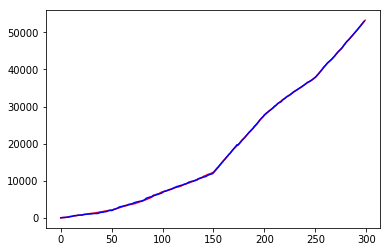

In [338]:
# TESTING SPLINE
D = Data_Stuff(100, 50, 10000)
data = D.plot_cdf()
pred, actual = test_manual_spline(data, is_cdf = True)

In [341]:
error = 0
for i in range(len(actual)):
    error += three_errors(actual[i], pred[i])
    
print('ERROR = ', error)

rmse =  0.0016942211789032116
var =  0.9996166147453495
overlap =  0.9909181493644771
rmse =  0.00047023483368282756
var =  0.999746537872894
overlap =  0.9986743669171191
rmse =  0.0002925068762654919
var =  0.9994593616033928
overlap =  0.9993174696053705
rmse =  0.00024353757691538224
var =  0.9997402804399865
overlap =  0.999496834532512
rmse =  9.96014922332035e-05
var =  0.9999319146984513
overlap =  0.9997957137759864
ERROR =  0.0027572452838960926


# SVD

In [358]:
test = np.array([[50,60,30], [30,25,33], [4,50,60],[50,70,30]])

In [356]:
u,s,v = np.linalg.svd(test, full_matrices=False)

In [357]:
smat = np.diag(s)
np.allclose(test, np.dot(u, np.dot(smat, v)))

True

In [416]:
class SVD():
    
    def __init__(self, learning_rate, n_epochs, n_factors, data, n_products, n_events):
        self.lr = learning_rate  # learning rate for SGD
        self.n_epochs = n_epochs  # number of iterations of SGD
        self.n_factors = n_factors  # number of factors
        self.volumes = data
        self.n_products = n_products
        self.n_events = n_events
        
    def fit(self):
        # Randomly initialize the user and item factors.
        p = np.random.normal(0.1, .1, (self.n_products, self.n_factors))
        q = np.random.normal(0.1, .1, (self.n_events, self.n_factors))
        
        # SGD procedure
        for _ in range(self.n_epochs):
            for u, i, v_ui in self.volumes:
                u = int(u)
                i = int(i)
                grad_p = 2*q[i]*(v_ui - np.dot(p[u], q[i]))
                grad_q = 2*p[u]*(v_ui - np.dot(p[u], q[i]))
                err = v_ui - np.dot(p[u], q[i])
#                 print(err)
                p[u] += self.lr * grad_p
                q[i] += self.lr * grad_q
#                 print("p = ", p[u])
#                 print('q = ', q[i])

        
        self.p, self.q = p, q

        
    def estimate(self, u, i):
        '''Return the estmimated rating of user u for item i.'''
        
        return np.dot(self.p[u], self.q[i])


In [417]:
learning_rate = 0.01
n_epochs = 100
n_factors = 10 
n_products = 20
n_events = 10
data = []
for i in range(100):
    u = np.random.randint(0,20,1)
    i = np.random.randint(0,10,1)
    v = np.random.normal(20, 5, 1)
    data.append([u,i,v])
data = np.array(data)


svd = SVD(learning_rate, n_epochs, n_factors, data, n_products, n_events)
svd.fit()

In [418]:
svd.estimate(17, 9)

25.661009785843255

One problem is that this blows up really easily. Not sure why.

# KNN Clustering